Plots: MassProfilePlotter
=========================

This example illustrates how to plot a `MassProfile` using a `MassProfilePlotter`.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


First, lets create a simple `MassProfile` which we'll plot.

In [2]:
mass = al.mp.EllipticalIsothermal(
    centre=(0.0, 0.0),
    einstein_radius=1.6,
    elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.7, phi=45.0),
)

We also need the 2D grid the `MassProfile` is evaluated on.

In [3]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05)

We now pass the mass profile and grid to a `MassProfilePlotter` and call various `figure_*` methods to 
plot different attributes.

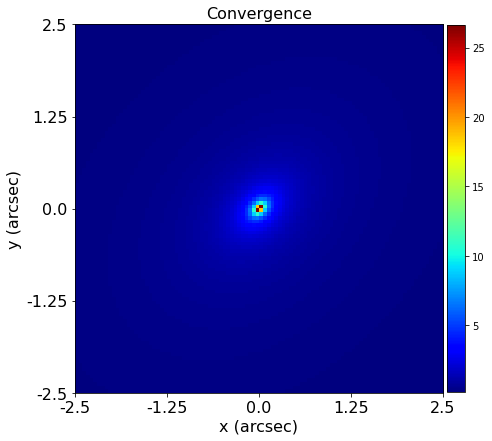

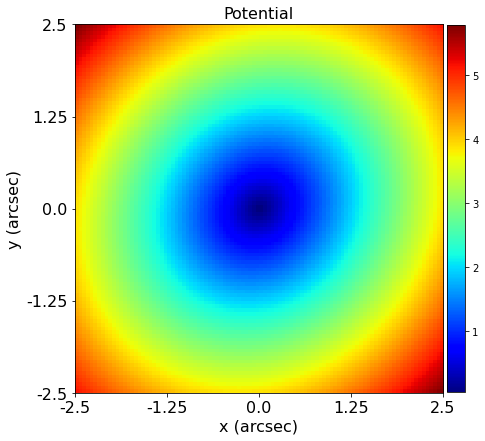

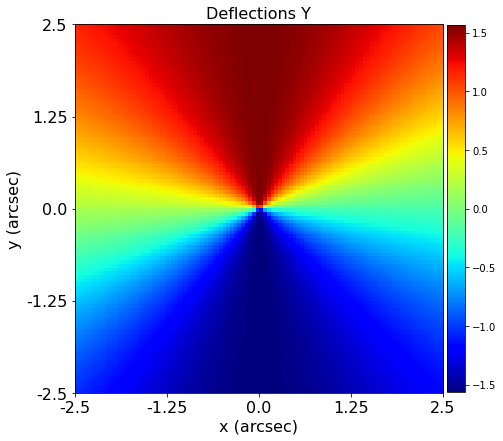

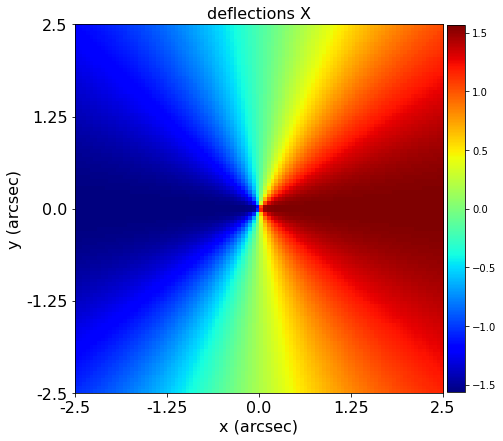

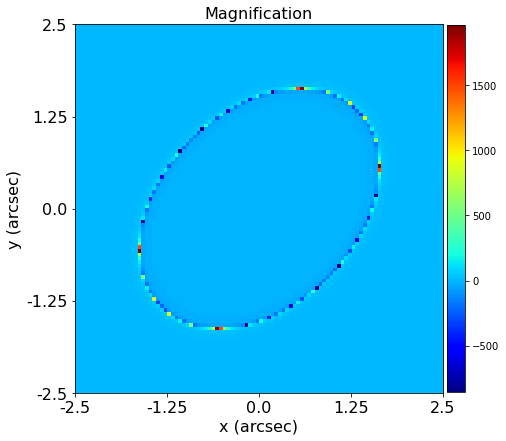

In [4]:
mass_profile_plotter = aplt.MassProfilePlotter(mass_profile=mass, grid=grid)
mass_profile_plotter.figures(
    convergence=True,
    potential=True,
    deflections_y=True,
    deflections_x=True,
    magnification=True,
)

A `MassProfile` and its `Grid2D` contains the following attributes which can be plotted automatically via 
the `Include2D` object.

(By default, a `Grid2D` does not contain a `Mask2D`, we therefore manually created a `Grid2D` with a mask to illustrate
plotting its mask and border below).

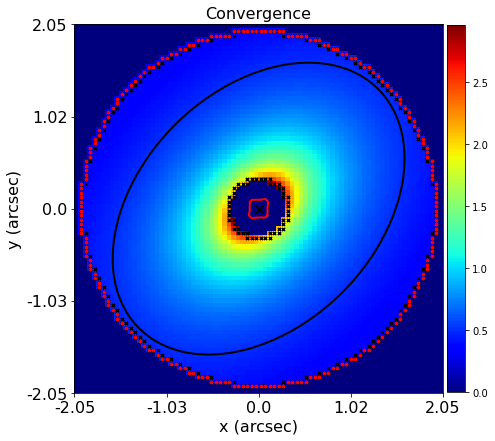

In [5]:
mask = al.Mask2D.circular_annular(
    shape_native=grid.shape_native,
    pixel_scales=grid.pixel_scales,
    inner_radius=0.3,
    outer_radius=2.0,
    sub_size=grid.sub_size,
)
masked_grid = al.Grid2D.from_mask(mask=mask)

include_2d = aplt.Include2D(
    origin=True, mask=True, border=True, mass_profile_centres=True, critical_curves=True
)
mass_profile_plotter = aplt.MassProfilePlotter(
    mass_profile=mass, grid=masked_grid, include_2d=include_2d
)
mass_profile_plotter.figures(convergence=True)

Finish.